In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df=r"C:\Users\nupur\python data science\datasets\Churn_Modelling.csv"

In [3]:
df=pd.read_csv(df)

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X=df.iloc[:,4:13]
Y=df.iloc[:,-1]

In [6]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [8]:
X=X.drop(["Geography","Gender"],axis=1)
X=pd.concat([X,geography,gender],axis=1)

In [9]:
X

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,42,2,0.00,1,1,1,101348.88,False,False,False
1,41,1,83807.86,1,0,1,112542.58,False,True,False
2,42,8,159660.80,3,1,0,113931.57,False,False,False
3,39,1,0.00,2,0,0,93826.63,False,False,False
4,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,False,False,True
9996,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,36,7,0.00,1,0,1,42085.58,False,False,False
9998,42,3,75075.31,2,1,0,92888.52,True,False,True


In [10]:
import sklearn 
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
x_train.shape

(8000, 10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

In [15]:
classifier=Sequential()
#input layer
classifier.add(Dense(units=10,activation="relu"))
#first hidden layer
classifier.add(Dense(units=11,activation="relu"))
classifier.add(Dropout(0.2))
#second hidden layer
classifier.add(Dense(units=9,activation="relu"))
classifier.add(Dropout(0.3))
#output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [16]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [17]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [20]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=60,callbacks=early_stopping)

Epoch 1/60
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8425 - loss: 0.3549 - val_accuracy: 0.8489 - val_loss: 0.3673
Epoch 2/60
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8461 - loss: 0.3566 - val_accuracy: 0.8546 - val_loss: 0.3639
Epoch 3/60
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8389 - loss: 0.3572 - val_accuracy: 0.8516 - val_loss: 0.3600
Epoch 4/60
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8330 - loss: 0.3653 - val_accuracy: 0.8470 - val_loss: 0.3603
Epoch 5/60
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8488 - loss: 0.3520 - val_accuracy: 0.8527 - val_loss: 0.3613
Epoch 6/60
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8467 - loss: 0.3541 - val_accuracy: 0.8489 - val_loss: 0.3591
Epoch 7/60
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8316 - loss: 0.3658 - val_accuracy: 0.8398 - val_loss: 0.3866
Epoch 8/60
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8352 - loss: 0.3636 - val_accuracy: 0.

In [21]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
import matplotlib.pyplot as plt

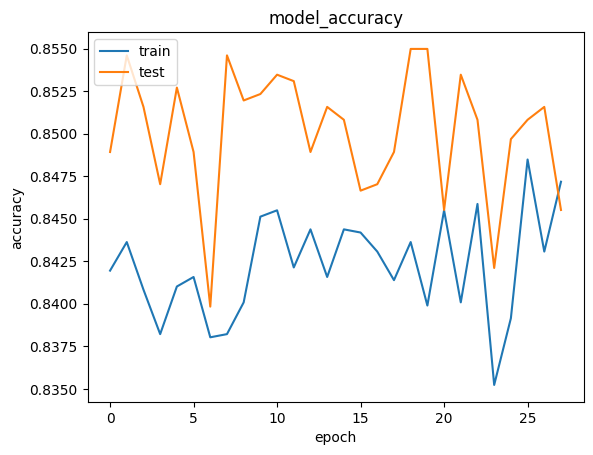

In [23]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title('model_accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [24]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1497,  110],
       [ 176,  217]], dtype=int64)

In [27]:
score=accuracy_score(y_pred,y_test)
score

0.857